In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


In [2]:
def date_to_datetime(data):
    data['DATE']= pd.to_datetime(data.DATE, format='%d/%m/%Y')
    data['DATE'] = data['DATE'].dt.date
    return data

In [3]:
def set_data(data):
    dates = data['DATE']
    dates = [dates[i].replace("-", "/") for i in range(0,len(dates))]
    dates = [f'{i.split("/")[2]}/{i.split("/")[1]}/{i.split("/")[0]}' for i in dates]
    data['DATE'] = dates
    data_df = date_to_datetime(data)
    return data_df

In [4]:
#GDP - yearly, 2001 to 2019
#units: Millions of Dollars, Not Seasonally Adjusted
#https://fred.stlouisfed.org/series/NGMP19100
#https://fred.stlouisfed.org/series/NGMP29820
#https://fred.stlouisfed.org/series/NGMP14860
BP_GDP = pd.read_csv("datasets/BP_GDP.csv")
BP_GDP.rename(columns={ BP_GDP.columns[1]: "GDP" }, inplace = True)
BP_GDP_df = set_data(BP_GDP)
BP_GDP_df['GDP_1_Year_Change']=BP_GDP_df['GDP'].pct_change()

Dallas_GDP = pd.read_csv("datasets/Dallas_GDP.csv")
Dallas_GDP.rename(columns={ Dallas_GDP.columns[1]: "GDP" }, inplace = True)
Dallas_GDP_df = set_data(Dallas_GDP)
Dallas_GDP_df['GDP_1_Year_Change']=Dallas_GDP_df['GDP'].pct_change()

LV_GDP = pd.read_csv("datasets/LV_GDP.csv")
LV_GDP.rename(columns={ LV_GDP.columns[1]: "GDP" }, inplace = True)
LV_GDP_df = set_data(LV_GDP)
LV_GDP_df['GDP_1_Year_Change']=LV_GDP_df['GDP'].pct_change()


#INCOME - yearly, 1996 to 2019
#units:  Millions of Dollars, Not Seasonally Adjusted
#https://fred.stlouisfed.org/series/LASV832PCPI
#https://fred.stlouisfed.org/series/DALL148PCPI
#https://fred.stlouisfed.org/series/BRID909PCPI
BP_Income = pd.read_csv("datasets/BP_Income.csv")
BP_Income = BP_Income.rename(columns={'1_Year_Change': 'Income_1_Year_Change'})
BP_Income_df = date_to_datetime(BP_Income)
BP_Income_df['Per_Capita_Income'] = BP_Income_df['Per_Capita_Income']/1000000

Dallas_Income = pd.read_csv("datasets/Dallas_Income.csv")
Dallas_Income = Dallas_Income.rename(columns={'1_Year_Change': 'Income_1_Year_Change'})
Dallas_Income_df = date_to_datetime(Dallas_Income)
Dallas_Income_df['Per_Capita_Income'] = Dallas_Income_df['Per_Capita_Income']/1000000

LV_Income = pd.read_csv("datasets/LV_Income.csv")
LV_Income = LV_Income.rename(columns={'1_Year_Change': 'Income_1_Year_Change'})
LV_Income_df = date_to_datetime(LV_Income)
LV_Income_df = LV_Income_df[LV_Income_df['DATE'] >= dt.date(1996,1,1)]
LV_Income_df['Per_Capita_Income'] = LV_Income_df['Per_Capita_Income']/1000000


#POPULATION - yearly, 2000 to 2019
#units: Thousands of Persons, Not Seasonally Adjusted
#https://fred.stlouisfed.org/series/LSVPOP
#https://fred.stlouisfed.org/series/DFWPOP
#https://fred.stlouisfed.org/series/BRGPOP
BP_POP = pd.read_csv("datasets/BP_POP.csv")
BP_POP.rename(columns={ BP_POP.columns[1]: "POP" }, inplace = True)
BP_POP_df = set_data(BP_POP)
BP_POP_df['POP_1_Year_Change']=BP_POP_df['POP'].pct_change()

Dallas_POP = pd.read_csv("datasets/Dallas_POP.csv")
Dallas_POP.rename(columns={ Dallas_POP.columns[1]: "POP" }, inplace = True)
Dallas_POP_df = set_data(Dallas_POP)
Dallas_POP_df['POP_1_Year_Change']=Dallas_POP_df['POP'].pct_change()

LV_POP = pd.read_csv("datasets/LV_POP.csv")
LV_POP.rename(columns={ LV_POP.columns[1]: "POP" }, inplace = True)
LV_POP_df = set_data(LV_POP)
LV_POP_df['POP_1_Year_Change']=LV_POP_df['POP'].pct_change()


#HPI - quarterly, 1996 to 10.2020
#units:
#
#
#
BP_HPI = pd.read_csv("datasets/BP_HPI.csv")
BP_HPI = BP_HPI.rename(columns={'1_Year_Change': 'HPI_1_Year_Change','1_Quarter_Change': 'HPI_1_Quarter_Change'})
BP_HPI_df = date_to_datetime(BP_HPI)

Dallas_HPI = pd.read_csv("datasets/Dallas_HPI.csv")
Dallas_HPI = Dallas_HPI.rename(columns={'1_Year_Change': 'HPI_1_Year_Change','1_Quarter_Change': 'HPI_1_Quarter_Change'})
Dallas_HPI_df = date_to_datetime(Dallas_HPI)

LV_HPI = pd.read_csv("datasets/LV_HPI.csv")
LV_HPI = LV_HPI.rename(columns={'1_Year_Change': 'HPI_1_Year_Change','1_Quarter_Change': 'HPI_1_Quarter_Change'})
LV_HPI_df = date_to_datetime(LV_HPI)


#UNEMPLOYMENT - monthly, 1996 to 01.2021
#units:Percent,Not Seasonally Adjusted
#https://fred.stlouisfed.org/series/BRID909URN
#https://fred.stlouisfed.org/series/DALL148URN
#https://fred.stlouisfed.org/series/LASV832URN
BP_unemp = pd.read_csv("datasets/BP_unemp.csv")
BP_unemp = BP_unemp.rename(columns={'Date': 'DATE',"1_Month_Change":"unemp_1_Month_Change","12_Months_Change":"unemp_1_Year_Change"})
BP_unemp_df = date_to_datetime(BP_unemp)

Dallas_unemp = pd.read_csv("datasets/Dallas_unemp.csv")
Dallas_unemp = Dallas_unemp.rename(columns={'Date': 'DATE',"1_Month_Change":"unemp_1_Month_Change","12_Months_Change":"unemp_1_Year_Change"})
Dallas_unemp_df = date_to_datetime(Dallas_unemp)

LV_unemp = pd.read_csv("datasets/LV_unemp.csv")
LV_unemp = LV_unemp.rename(columns={'Date': 'DATE',"1_Month_Change":"unemp_1_Month_Change","12_Months_Change":"unemp_1_Year_Change"})
LV_unemp_df = date_to_datetime(LV_unemp)


# Civilian Labor Force - monthly, 1996 to 01.2021
#units: Thousands of Persons
#https://fred.stlouisfed.org/series/BRID909LFN
#https://fred.stlouisfed.org/series/LASV832LFN
#https://fred.stlouisfed.org/series/DALL148LFN
BP_CLF = pd.read_csv("datasets/BP_CLF.csv")
BP_CLF.rename(columns={ BP_CLF.columns[1]: "CLF" }, inplace = True)
BP_CLF_df = set_data(BP_CLF)
BP_CLF_df['CLF'] = BP_CLF_df['CLF']/1000
BP_CLF_df['CLF_1_Year_Change']=BP_CLF_df['CLF'].pct_change()

Dallas_CLF = pd.read_csv("datasets/Dallas_CLF.csv")
Dallas_CLF.rename(columns={ Dallas_CLF.columns[1]: "CLF" }, inplace = True)
Dallas_CLF_df = set_data(Dallas_CLF)
Dallas_CLF_df['CLF'] = Dallas_CLF_df['CLF']/1000
Dallas_CLF_df['CLF_1_Year_Change']=Dallas_CLF_df['CLF'].pct_change()

LV_CLF = pd.read_csv("datasets/LV_CLF.csv")
LV_CLF.rename(columns={ LV_CLF.columns[1]: "CLF" }, inplace = True)
LV_CLF_df = set_data(LV_CLF)
LV_CLF_df['CLF'] = LV_CLF_df['CLF']/1000
LV_CLF_df['CLF_1_Year_Change']=LV_CLF_df['CLF'].pct_change()


<ipython-input-4-c01c1200ab8b>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LV_Income_df['Per_Capita_Income'] = LV_Income_df['Per_Capita_Income']/1000000


In [5]:
BP_m1 = pd.merge(BP_unemp_df, BP_HPI_df, on="DATE", how="outer")
BP_m2 = pd.merge(BP_m1, BP_Income_df, on="DATE", how="outer")
BP_m3 = pd.merge(BP_m2, BP_CLF_df, on="DATE", how="outer")
BP_m4 = pd.merge(BP_m3, BP_POP_df, on="DATE", how="outer")
BP_df = pd.merge(BP_m4, BP_GDP_df, on="DATE", how="outer")
BP_df['State'] = 'CT'
BP_df['MSA'] = 'Bridgeport-Stamford-Norwalk'
BP_df['HPI_in_1_year'] = BP_df['HPI'].shift(-12)
BP_df['HPI_in_2_years'] = BP_df['HPI'].shift(-24)
BP_df['HPI_in_3_years'] = BP_df['HPI'].shift(-36)
BP_df.to_csv("BP_df.csv")
BP_df

DATE  Unemployement  unemp_1_Month_Change  unemp_1_Year_Change  \
0    1996-01-01            5.3              0.261905            -0.018519   
1    1996-02-01            5.1             -0.037736            -0.019231   
2    1996-03-01            4.8             -0.058824            -0.020408   
3    1996-04-01            4.5             -0.062500            -0.081633   
4    1996-05-01            4.8              0.066667            -0.020408   
..          ...            ...                   ...                  ...   
296  2020-09-01            7.9             -0.070588             1.257143   
297  2020-10-01            6.1             -0.227848             0.742857   
298  2020-11-01            8.0              0.311475             1.424242   
299  2020-12-01            7.6             -0.050000             1.375000   
300  2021-01-01            8.7              0.144737             0.933333   

        HPI  HPI_1_Quarter_Change  HPI_1_Year_Change  Per_Capita_Income  \
0    106.23              0.014710           0.062300           0.045652   
1       NaN                   NaN                NaN                NaN   
2       NaN                   NaN                NaN                NaN   
3    104.57             -0.015626           0.028220                NaN   
4       NaN                   NaN                NaN                NaN   
..      ...                   ...                ...                ...   
296     NaN                   NaN                NaN                NaN   
297  218.41              0.027183           0.060088                NaN   
298     NaN                   NaN                NaN                NaN   
299     NaN                   NaN                NaN                NaN   
300     NaN                   NaN                NaN                NaN   

     Income_1_Year_Change      CLF  CLF_1_Year_Change  POP  POP_1_Year_Change  \
0                0.062886  433.060                NaN  NaN                NaN   
1                     NaN  432.054          -0.002323  NaN                NaN   
2                     NaN  436.224           0.009652  NaN                NaN   
3                     NaN  436.262           0.000087  NaN                NaN   
4                     NaN  440.028           0.008632  NaN                NaN   
..                    ...      ...                ...  ...                ...   
296                   NaN  453.494           0.007498  NaN                NaN   
297                   NaN  442.180          -0.024949  NaN                NaN   
298                   NaN  452.116           0.022470  NaN                NaN   
299                   NaN  446.116          -0.013271  NaN                NaN   
300                   NaN  438.437          -0.017213  NaN                NaN   

     GDP  GDP_1_Year_Change State                          MSA  HPI_in_1_year  \
0    NaN                NaN    CT  Bridgeport-Stamford-Norwalk         106.43   
1    NaN                NaN    CT  Bridgeport-Stamford-Norwalk            NaN   
2    NaN                NaN    CT  Bridgeport-Stamford-Norwalk            NaN   
3    NaN                NaN    CT  Bridgeport-Stamford-Norwalk         107.48   
4    NaN                NaN    CT  Bridgeport-Stamford-Norwalk            NaN   
..   ...                ...   ...                          ...            ...   
296  NaN                NaN    CT  Bridgeport-Stamford-Norwalk            NaN   
297  NaN                NaN    CT  Bridgeport-Stamford-Norwalk            NaN   
298  NaN                NaN    CT  Bridgeport-Stamford-Norwalk            NaN   
299  NaN                NaN    CT  Bridgeport-Stamford-Norwalk            NaN   
300  NaN                NaN    CT  Bridgeport-Stamford-Norwalk            NaN   

     HPI_in_2_years  HPI_in_3_years  
0            112.17          119.28  
1               NaN             NaN  
2               NaN             NaN  
3            112.87          121.55  
4               NaN             NaN  
..         

In [6]:
Dallas_m1 = pd.merge(Dallas_unemp_df, Dallas_HPI_df, on="DATE", how="outer")
Dallas_m2 = pd.merge(Dallas_m1, Dallas_Income_df, on="DATE", how="outer")
Dallas_m3 = pd.merge(Dallas_m2, Dallas_CLF_df, on="DATE", how="outer")
Dallas_m4 = pd.merge(Dallas_m3, Dallas_POP_df, on="DATE", how="outer")
Dallas_df = pd.merge(Dallas_m4, Dallas_GDP_df, on="DATE", how="outer")
Dallas_df['State'] = 'TX'
Dallas_df['MSA'] = 'Dallas-Fort Worth-Arlington'
Dallas_df['HPI_in_1_year'] = Dallas_df['HPI'].shift(-12)
Dallas_df['HPI_in_2_years'] = Dallas_df['HPI'].shift(-24)
Dallas_df['HPI_in_3_years'] = Dallas_df['HPI'].shift(-36)
Dallas_df.to_csv("Dallas_df.csv")
Dallas_df

DATE  Unemployement  unemp_1_Month_Change  unemp_1_Year_Change  \
0    1996-01-01            4.5             -0.021739            -0.062500   
1    1996-02-01            4.4             -0.022222            -0.063830   
2    1996-03-01            4.3             -0.022727            -0.085106   
3    1996-04-01            4.2             -0.023256            -0.106383   
4    1996-05-01            4.1             -0.023810            -0.127660   
..          ...            ...                   ...                  ...   
296  2020-09-01            7.5              0.190476             1.343750   
297  2020-10-01            6.2             -0.173333             0.937500   
298  2020-11-01            7.4              0.193548             1.312500   
299  2020-12-01            6.7             -0.094595             1.093750   
300  2021-01-01            6.6             -0.014925             1.062500   

        HPI  HPI_1_Quarter_Change  HPI_1_Year_Change  Per_Capita_Income  \
0    105.01              0.009712           0.050100           0.026533   
1       NaN                   NaN                NaN                NaN   
2       NaN                   NaN                NaN                NaN   
3    104.86             -0.001428           0.032696                NaN   
4       NaN                   NaN                NaN                NaN   
..      ...                   ...                ...                ...   
296     NaN                   NaN                NaN                NaN   
297  290.22              0.020715           0.048142                NaN   
298     NaN                   NaN                NaN                NaN   
299     NaN                   NaN                NaN                NaN   
300     NaN                   NaN                NaN                NaN   

     Income_1_Year_Change       CLF  CLF_1_Year_Change  POP  \
0                0.060217  2526.551                NaN  NaN   
1                     NaN  2534.492           0.003143  NaN   
2                     NaN  2546.251           0.004640  NaN   
3                     NaN  2551.821           0.002188  NaN   
4                     NaN  2564.633           0.005021  NaN   
..                    ...       ...                ...  ...   
296                   NaN  4044.158          -0.010381  NaN   
297                   NaN  4023.581          -0.005088  NaN   
298                   NaN  4054.318           0.007639  NaN   
299                   NaN  4059.126           0.001186  NaN   
300                   NaN  4028.595          -0.007522  NaN   

     POP_1_Year_Change  GDP  GDP_1_Year_Change State  \
0                  NaN  NaN                NaN    TX   
1                  NaN  NaN                NaN    TX   
2                  NaN  NaN                NaN    TX   
3                  NaN  NaN                NaN    TX   
4                  NaN  NaN                NaN    TX   
..                 ...  ...                ...   ...   
296                NaN  NaN                NaN    TX   
297                NaN  NaN                NaN    TX   
298                NaN  NaN                NaN    TX   
299                NaN  NaN                NaN    TX   
300                NaN  NaN                NaN    TX   

                             MSA  HPI_in_1_year  HPI_in_2_years  \
0    Dallas-Fort Worth-Arlington         106.96          112.14   
1    Dallas-Fort Worth-Arlington            NaN             NaN   
2    Dallas-Fort Worth-Arlington            NaN             NaN   
3    Dallas-Fort Worth-Arlington         107.75          112.93   
4    Dallas-Fort Worth-Arlington            NaN             NaN   
..                           ...            ...             ...   
296  Dallas-Fort Worth-Arlington            NaN             NaN   
297  Dallas-Fort Worth-Arlington            NaN             NaN   
298  Dallas-Fort Worth-Arlington            NaN             NaN   
299  Dallas-Fort Worth-Arlington            NaN             NaN   
300  Dallas-Fort W

In [7]:
LV_m1 = pd.merge(LV_unemp_df, LV_HPI_df, on="DATE", how="outer")
LV_m2 = pd.merge(LV_m1, LV_Income_df, on="DATE", how="outer")
LV_m3 = pd.merge(LV_m2, LV_CLF_df, on="DATE", how="outer")
LV_m4 = pd.merge(LV_m3, LV_POP_df, on="DATE", how="outer")
LV_df = pd.merge(LV_m4, LV_GDP_df, on="DATE", how="outer")
LV_df['State'] = 'NV'
LV_df['MSA'] = 'Las Vegas-Henderson-Paradise'
LV_df['HPI_in_1_year'] = LV_df['HPI'].shift(-12)
LV_df['HPI_in_2_years'] = LV_df['HPI'].shift(-24)
LV_df['HPI_in_3_years'] = LV_df['HPI'].shift(-36)
LV_df.to_csv("LV_df.csv")
LV_df

DATE  Unemployement  unemp_1_Month_Change  unemp_1_Year_Change  \
0    1996-01-01            5.2             -0.018868            -0.103448   
1    1996-02-01            5.2              0.000000            -0.103448   
2    1996-03-01            5.1             -0.019231            -0.105263   
3    1996-04-01            5.0             -0.019608            -0.122807   
4    1996-05-01            5.0              0.000000            -0.107143   
..          ...            ...                   ...                  ...   
296  2020-09-01           14.5             -0.070513             2.717949   
297  2020-10-01           13.9             -0.041379             2.657895   
298  2020-11-01           12.0             -0.136691             2.243243   
299  2020-12-01           10.5             -0.125000             1.837838   
300  2021-01-01            9.7             -0.076190             1.552632   

        HPI  HPI_1_Quarter_Change  HPI_1_Year_Change  Per_Capita_Income  \
0    105.54              0.011695           0.055400           0.026047   
1       NaN                   NaN                NaN                NaN   
2       NaN                   NaN                NaN                NaN   
3    104.76             -0.007391           0.025149                NaN   
4       NaN                   NaN                NaN                NaN   
..      ...                   ...                ...                ...   
296     NaN                   NaN                NaN                NaN   
297  248.38              0.017034           0.054647                NaN   
298     NaN                   NaN                NaN                NaN   
299     NaN                   NaN                NaN                NaN   
300     NaN                   NaN                NaN                NaN   

     Income_1_Year_Change       CLF  CLF_1_Year_Change  POP  \
0                0.054449   568.415                NaN  NaN   
1                     NaN   577.357           0.015731  NaN   
2                     NaN   579.212           0.003213  NaN   
3                     NaN   582.085           0.004960  NaN   
4                     NaN   587.022           0.008482  NaN   
..                    ...       ...                ...  ...   
296                   NaN  1142.307           0.035315  NaN   
297                   NaN  1138.873          -0.003006  NaN   
298                   NaN  1097.932          -0.035949  NaN   
299                   NaN  1084.944          -0.011830  NaN   
300                   NaN  1108.650           0.021850  NaN   

     POP_1_Year_Change  GDP  GDP_1_Year_Change State  \
0                  NaN  NaN                NaN    NV   
1                  NaN  NaN                NaN    NV   
2                  NaN  NaN                NaN    NV   
3                  NaN  NaN                NaN    NV   
4                  NaN  NaN                NaN    NV   
..                 ...  ...                ...   ...   
296                NaN  NaN                NaN    NV   
297                NaN  NaN                NaN    NV   
298                NaN  NaN                NaN    NV   
299                NaN  NaN                NaN    NV   
300                NaN  NaN                NaN    NV   

                              MSA  HPI_in_1_year  HPI_in_2_years  \
0    Las Vegas-Henderson-Paradise         106.07          110.33   
1    Las Vegas-Henderson-Paradise            NaN             NaN   
2    Las Vegas-Henderson-Paradise            NaN             NaN   
3    Las Vegas-Henderson-Paradise         106.16          110.46   
4    Las Vegas-Henderson-Paradise            NaN             NaN   
..                            ...            ...             ...   
296  Las Vegas-Henderson-Paradise            NaN             NaN   
297  Las Vegas-Henderson-Paradise            NaN             NaN   
298  Las Vegas-Henderson-Paradise            NaN             NaN   
299  Las Vegas-Henderson-Paradise            NaN             NaN   
300  La

In [8]:
msas_concat_df = pd.concat([BP_df,Dallas_df,LV_df])
msas_concat_df.to_csv("msas_concat_df.csv")
msas_concat_df = msas_concat_df.reset_index()
msas_concat_df

index        DATE  Unemployement  unemp_1_Month_Change  \
0        0  1996-01-01            5.3              0.261905   
1        1  1996-02-01            5.1             -0.037736   
2        2  1996-03-01            4.8             -0.058824   
3        3  1996-04-01            4.5             -0.062500   
4        4  1996-05-01            4.8              0.066667   
..     ...         ...            ...                   ...   
898    296  2020-09-01           14.5             -0.070513   
899    297  2020-10-01           13.9             -0.041379   
900    298  2020-11-01           12.0             -0.136691   
901    299  2020-12-01           10.5             -0.125000   
902    300  2021-01-01            9.7             -0.076190   

     unemp_1_Year_Change     HPI  HPI_1_Quarter_Change  HPI_1_Year_Change  \
0              -0.018519  106.23              0.014710           0.062300   
1              -0.019231     NaN                   NaN                NaN   
2              -0.020408     NaN                   NaN                NaN   
3              -0.081633  104.57             -0.015626           0.028220   
4              -0.020408     NaN                   NaN                NaN   
..                   ...     ...                   ...                ...   
898             2.717949     NaN                   NaN                NaN   
899             2.657895  248.38              0.017034           0.054647   
900             2.243243     NaN                   NaN                NaN   
901             1.837838     NaN                   NaN                NaN   
902             1.552632     NaN                   NaN                NaN   

     Per_Capita_Income  Income_1_Year_Change  ...  CLF_1_Year_Change  POP  \
0             0.045652              0.062886  ...                NaN  NaN   
1                  NaN                   NaN  ...          -0.002323  NaN   
2                  NaN                   NaN  ...           0.009652  NaN   
3                  NaN                   NaN  ...           0.000087  NaN   
4                  NaN                   NaN  ...           0.008632  NaN   
..                 ...                   ...  ...                ...  ...   
898                NaN                   NaN  ...           0.035315  NaN   
899                NaN                   NaN  ...          -0.003006  NaN   
900                NaN                   NaN  ...          -0.035949  NaN   
901                NaN                   NaN  ...          -0.011830  NaN   
902                NaN                   NaN  ...           0.021850  NaN   

     POP_1_Year_Change  GDP  GDP_1_Year_Change  State  \
0                  NaN  NaN                NaN     CT   
1                  NaN  NaN                NaN     CT   
2                  NaN  NaN                NaN     CT   
3                  NaN  NaN                NaN     CT   
4                  NaN  NaN                NaN     CT   
..                 ...  ...                ...    ...   
898                NaN  NaN                NaN     NV   
899                NaN  NaN                NaN     NV   
900                NaN  NaN                NaN     NV   
901                NaN  NaN                NaN     NV   
902                NaN  NaN                NaN     NV   

                              MSA HPI_in_1_year  HPI_in_2_years  \
0     Bridgeport-Stamford-Norwalk        106.43          112.17   
1     Bridgeport-Stamford-Norwalk           NaN             NaN   
2     Bridgeport-Stamford-Norwalk           NaN             NaN   
3     Bridgeport-Stamford-Norwalk        107.48          112.87   
4     Bridgeport-Stamford-Norwalk           NaN             NaN   
..                            ...           ...             ...   
898  Las Vegas-Henderson-Paradise           NaN             NaN   
899  Las Vegas-Henderson-Paradise           NaN             NaN   
900  Las Vegas-Henderson-Paradise           NaN             NaN   
901  Las Vegas-Henderson-Paradise          

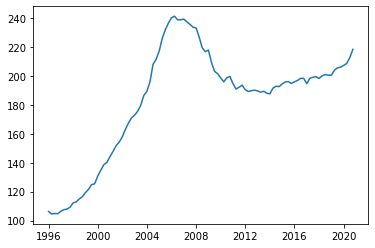

In [9]:
plt.plot(BP_HPI_df['DATE'],BP_HPI_df['HPI'])

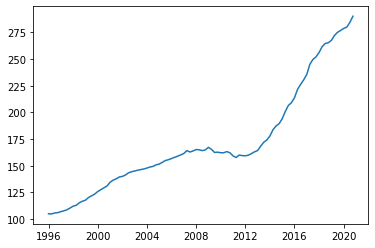

In [10]:
plt.plot(Dallas_HPI_df['DATE'],Dallas_HPI_df['HPI'])

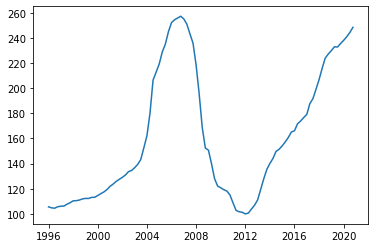

In [11]:
plt.plot(LV_HPI_df['DATE'],LV_HPI_df['HPI'])